# BIGDATA 230B Homework 3: Nifi
## Leo Salemann
## 8/2/17

In [137]:
import json
import pandas as pd
import os
from pandas.io.json import json_normalize
%matplotlib inline
import matplotlib.pyplot as plt

### Do a few OS commands to list files and inspect contents

In [147]:
!ls json

Apple_20.json  Apple_26.json  Apple_28.json  Apple_29.json  Apple_2d.json


In [138]:
!cat json/Apple_20.json

{
"id": "22144"
,"t" : "AAPL"
,"e" : "NASDAQ"
,"l" : "157.45"
,"l_fix" : "157.45"
,"l_cur" : "157.44"
,"s": "0"
,"ltt":"2:00PM EDT"
,"lt" : "Aug 2, 2:00PM EDT"
,"lt_dts" : "2017-08-02T14:00:09Z"
,"c" : "+7.40"
,"c_fix" : "7.40"
,"cp" : "4.93"
,"cp_fix" : "4.93"
,"ccol" : "chg"
,"pcls_fix" : "150.05"
}


### Turn a json file into a dataframe

In [139]:
with open('./json/Apple_20.json') as json_file:
  raw_json = json.load(json_file)

raw_json

normal_json = json_normalize(raw_json) 
normal_json

,c,c_fix,ccol,cp,cp_fix,e,id,l,l_cur,l_fix,lt,lt_dts,ltt,pcls_fix,s,t
0,+7.40,7.40,chg,4.93,4.93,NASDAQ,22144,157.45,157.44,157.45,"Aug 2, 2:00PM EDT",2017-08-02T14:00:09Z,2:00PM EDT,150.05,0,AAPL


In [140]:
normal_json.dtypes

c           object
c_fix       object
ccol        object
cp          object
cp_fix      object
e           object
id          object
l           object
l_cur       object
l_fix       object
lt          object
lt_dts      object
ltt         object
pcls_fix    object
s           object
t           object
dtype: object

### Iterate over the json files and load them all, into a single multi-row dataframe

In [141]:
top_folder = "./json"
first_time = True

for filename in os.listdir(top_folder):
    filepath = top_folder + "/" + filename


    with open(filepath) as json_file:
      raw_json = json.load(json_file)

    if (first_time):
 
        first_time = False
        bigdf = json_normalize(raw_json) 
    else:

        new_json = json_normalize(raw_json)
        bigdf = bigdf.append(new_json, ignore_index=True)
    
bigdf

,c,c_fix,ccol,cp,cp_fix,e,id,l,l_cur,l_fix,lt,lt_dts,ltt,pcls_fix,s,t
0,+7.43,7.43,chg,4.95,4.95,NASDAQ,22144,157.48,157.48,157.48,"Aug 2, 1:56PM EDT",2017-08-02T13:56:06Z,1:56PM EDT,150.05,0,AAPL
1,+7.31,7.31,chg,4.87,4.87,NASDAQ,22144,157.36,157.36,157.36,"Aug 2, 1:58PM EDT",2017-08-02T13:58:10Z,1:58PM EDT,150.05,0,AAPL
2,+7.40,7.40,chg,4.93,4.93,NASDAQ,22144,157.45,157.44,157.45,"Aug 2, 2:00PM EDT",2017-08-02T14:00:09Z,2:00PM EDT,150.05,0,AAPL
3,+7.36,7.36,chg,4.91,4.91,NASDAQ,22144,157.41,157.41,157.41,"Aug 2, 1:54PM EDT",2017-08-02T13:54:08Z,1:54PM EDT,150.05,0,AAPL
4,+7.33,7.33,chg,4.89,4.89,NASDAQ,22144,157.38,157.38,157.38,"Aug 2, 1:52PM EDT",2017-08-02T13:52:07Z,1:52PM EDT,150.05,0,AAPL


In [142]:
bigdf.dtypes

c           object
c_fix       object
ccol        object
cp          object
cp_fix      object
e           object
id          object
l           object
l_cur       object
l_fix       object
lt          object
lt_dts      object
ltt         object
pcls_fix    object
s           object
t           object
dtype: object

### Make a mni dataframe with just the columns we want, in the data types we need

In [143]:
minidf4 = pd.DataFrame({'when': pd.to_datetime(bigdf.ltt), 'price': pd.to_numeric(bigdf.l)})
minidf4

,price,when
0,157.48,2017-08-02 13:56:00
1,157.36,2017-08-02 13:58:00
2,157.45,2017-08-02 14:00:00
3,157.41,2017-08-02 13:54:00
4,157.38,2017-08-02 13:52:00


In [144]:
minidf4.dtypes

price           float64
when     datetime64[ns]
dtype: object

### Plot the resutls. Spectacular

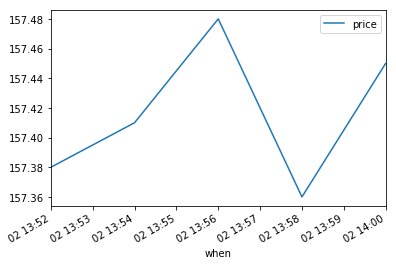

In [145]:
minidf4.plot(x=minidf4.when)